# pandas


Пакет для статистической обработки данных, по функциональности близкий к R.

In [1]:
import numpy as np
import pandas as pd

## Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan` (в этот день термометр сломался или метеоролог был пьян); они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

In [3]:
l = [1,3,5,np.nan,6,8]
s = pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [4]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

Обычная индексация.

In [5]:
s[2]

5.0

In [6]:
s[2]=7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [8]:
s1=s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
s2=s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [10]:
s1+s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64


К наборам данных можно применять функции из `numpy`.

In [11]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [12]:
s.index

RangeIndex(start=0, stop=6, step=1)


Но можно создавать наборы данных с индексом, заданным списком.

In [13]:
i=list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [14]:
s=pd.Series(l,index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [16]:
s['c']

5.0

Если индекс - строка, то вместо s['c'] можно писать s.c.

In [17]:
s.c

5.0

Набор данных можно создать из словаря.

In [18]:
s=pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64


Можно отсортировать набор данных.

In [19]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [20]:
d=pd.date_range('20160101',periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [23]:
s=pd.Series(np.random.normal(size=10),index=d)
s

2016-01-01   -1.731554
2016-01-02   -0.578391
2016-01-03   -0.422298
2016-01-04    1.792410
2016-01-05   -0.826567
2016-01-06   -1.965615
2016-01-07    2.703224
2016-01-08   -0.457944
2016-01-09    0.494198
2016-01-10    0.412261
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [24]:
s>0

2016-01-01    False
2016-01-02    False
2016-01-03    False
2016-01-04     True
2016-01-05    False
2016-01-06    False
2016-01-07     True
2016-01-08    False
2016-01-09     True
2016-01-10     True
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [26]:
s[s>0]

2016-01-04    1.792410
2016-01-07    2.703224
2016-01-09    0.494198
2016-01-10    0.412261
dtype: float64

**Задание:** Вам дан массив из 1000 чисел. Оставьте в нем только те числа, которые делятся на 29, а их последняя цифра равна 3.

In [28]:
s = pd.Series(np.arange(1000))

# ответ

In [29]:
a = s%29 == 0
b = s%10 == 3
c = a & b
s[c]

203    203
493    493
783    783
dtype: int64

# Кумулятивные максимумы - от первого элемента до текущего.

In [33]:
True and False

False

In [31]:
s.cummax()

0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Length: 1000, dtype: int64


Кумулятивные суммы.

In [32]:
s=s.cumsum()
s

0           0
1           1
2           3
3           6
4          10
        ...  
995    495510
996    496506
997    497503
998    498501
999    499500
Length: 1000, dtype: int64


Построим график.

In [34]:
import matplotlib.pyplot as plt


In [35]:
s = pd.Series(np.arange(1000))
s=s.cumsum()

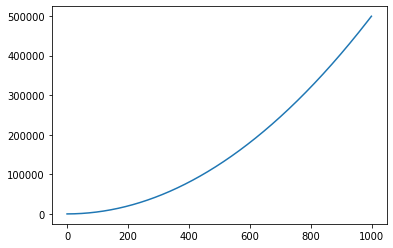

In [36]:
plt.plot(s)

## DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [37]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [38]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [39]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [40]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [41]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [42]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [43]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [44]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - столбца.

In [45]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [46]:
df.loc['b','one']

2.0

In [47]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [48]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [49]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [76]:
df['three']=df['one']*df['two']
df['new'] = f(series_1, series_2)
df['flag']=df['two']>2
df['apply'] = df['one'].apply(lambda x: str(x))

TypeError: <lambda>() missing 1 required positional argument: 'y'

In [56]:
df

,one,two,three,flag,apply
a,1.0,1,1.0,False,1.0
b,2.0,2,4.0,False,2.0
c,3.0,3,9.0,True,3.0
d,NaN,4,NaN,True,nan


Также можно удалять имеющиеся.

In [57]:
#del df['two']
df['foo']=0.
# df.drop(['foo'], axis=1)
del df['foo']
df

,one,two,three,flag,apply
a,1.0,1,1.0,False,1.0
b,2.0,2,4.0,False,2.0
c,3.0,3,9.0,True,3.0
d,NaN,4,NaN,True,nan



Добавим копию столбца `one`, в которую входят только строки до второй.

In [67]:
df['one_tr']=df['one'][:2]
df

,one,two,three,flag,apply,one_tr
a,1.0,1,1.0,False,1.0,1.0
b,2.0,2,4.0,False,2.0,2.0
c,3.0,3,9.0,True,3.0,NaN
d,NaN,4,NaN,True,nan,NaN


In [68]:
df1=df.loc[:,['one','one_tr']]
df1

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


In [69]:
df1.loc['a', :] = 2
df

,one,two,three,flag,apply,one_tr
a,1.0,1,1.0,False,1.0,1.0
b,2.0,2,4.0,False,2.0,2.0
c,3.0,3,9.0,True,3.0,NaN
d,NaN,4,NaN,True,nan,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [70]:
df2=pd.DataFrame({'one':{'a':0,'b':1},'one_tr':{'b':2}})
df2

,one,one_tr
a,0,NaN
b,1,2.0


In [72]:
df1

,one,one_tr
a,2.0,2.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


In [73]:
df3 = pd.concat([df1,df2], axis=0)
df3.loc['a']

,one,one_tr
a,2.0,2.0
a,0.0,NaN


In [65]:
df3.loc['a']

,one,two,three,flag,apply,one_tr
a,1.0,1.0,1.0,False,1.0,1.0
a,0.0,NaN,NaN,NaN,NaN,NaN


In [56]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,two,three
a,0.0,NaN
b,1.0,NaN
c,NaN,2.0
d,NaN,3.0


In [57]:
pd.concat([df,df2],axis=1)

,one,two,three,flag,one_tr,two,three
a,1.0,1,1.0,False,1.0,0.0,NaN
b,2.0,2,4.0,False,2.0,1.0,NaN
c,3.0,3,9.0,True,NaN,NaN,2.0
d,NaN,4,NaN,True,NaN,NaN,3.0


Можно загрузить файл с расширением `.csv`:

In [78]:
path_to_file = 'https://gist.githubusercontent.com/bigsnarfdude/515849391ad37fe593997fe0db98afaa/raw/f663366d17b7d05de61a145bbce7b2b961b3b07f/weather.csv'
weather = pd.read_csv(path_to_file, )

weather

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [79]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


**Задание:** создайте новую таблицу, в которой останутся только солнечные дни из предыдущей

,outlook,temperature,humidity,windy,play
9,sunny,hot,high,False,no
10,sunny,hot,high,True,no
11,sunny,mild,high,False,no
12,sunny,cool,normal,False,yes
13,sunny,mild,normal,True,yes


# ответ

In [61]:
df_new = weather[weather['outlook'] == 'sunny']
df_new

,outlook,temperature,humidity,windy,play
9,sunny,hot,high,False,no
10,sunny,hot,high,True,no
11,sunny,mild,high,False,no
12,sunny,cool,normal,False,yes
13,sunny,mild,normal,True,yes


In [87]:
weather.describe()

,outlook,temperature,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


# **Задание:**
 посчитайте вероятность того, что погода будет ветренной, при условии, что:
1. Температура низкая
2. Температура средняя
3. Температура высокая

In [62]:
# YOUR CODE HERE

# ответ


In [64]:
d  = weather.windy==True
a = weather.temperature == 'cool'
b = weather.temperature == 'mild'
c = weather.temperature == 'hot'




print(len( weather[d & a])/len(weather[a]))

print(len( weather[d & b])/len(weather[b]))

print(len( weather[d & c])/len(weather[c]))

0.5
0.5
0.25



# Создадим таблицу из массива случайных чисел.

In [88]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.916583,0.005108,1.490595,-0.484706
1,-0.903211,0.296216,-0.619255,0.376664
2,-0.555934,0.894228,2.569850,0.164582
3,0.155936,1.098891,-0.593524,-1.899092
4,-0.585093,-0.608233,2.883446,-0.166127
5,0.255975,0.560166,-0.120747,-0.549266
6,0.030086,0.160292,0.389620,0.099038
7,-1.235175,-0.081763,0.205753,-0.225426
8,-1.364885,1.136222,0.850141,-1.364456
9,-1.154414,-0.738397,0.592615,1.657237


In [89]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,-1.774633,-0.435312,1.348175,NaN
1,-0.047604,0.477460,0.087397,NaN
2,-1.641904,1.945996,2.986507,NaN
3,0.855130,1.881088,0.879467,NaN
4,-1.086947,0.481267,3.162550,NaN
5,0.118954,2.198579,-0.623317,NaN
6,-0.015323,-1.541965,1.874594,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [90]:
2*df+3

,A,B,C,D
0,1.166834,3.010216,5.981189,2.030589
1,1.193577,3.592431,1.761490,3.753327
2,1.888133,4.788456,8.139699,3.329164
3,3.311871,5.197783,1.812953,-0.798184
4,1.829815,1.783535,8.766892,2.667746
5,3.511951,4.120333,2.758506,1.901468
6,3.060172,3.320583,3.779240,3.198077
7,0.529650,2.836474,3.411506,2.549148
8,0.270230,5.272444,4.700283,0.271088
9,0.691172,1.523206,4.185229,6.314475


In [91]:
np.sin(df)

,A,B,C,D
0,-0.793527,0.005108,0.996786,-0.465948
1,-0.785319,0.291903,-0.580429,0.367820
2,-0.527736,0.779726,0.541099,0.163840
3,0.155304,0.890704,-0.559285,-0.946593
4,-0.552277,-0.571418,0.255289,-0.165364
5,0.253189,0.531327,-0.120454,-0.522061
6,0.030081,0.159606,0.379837,0.098876
7,-0.944206,-0.081672,0.204304,-0.223522
8,-0.978875,0.907049,0.751374,-0.978787
9,-0.914558,-0.673103,0.558532,0.996266


In [92]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.627330,0.272273,0.764849,-0.239155
std,0.594780,0.658786,1.216037,0.968194
min,-1.364885,-0.738397,-0.619255,-1.899092
25%,-1.094956,-0.060045,-0.039122,-0.533126
50%,-0.744152,0.228254,0.491117,-0.195777
75%,-0.116419,0.810712,1.330481,0.148196
max,0.255975,1.136222,2.883446,1.657237


In [93]:
df.sort_values(by='B')

,A,B,C,D
9,-1.154414,-0.738397,0.592615,1.657237
4,-0.585093,-0.608233,2.883446,-0.166127
7,-1.235175,-0.081763,0.205753,-0.225426
0,-0.916583,0.005108,1.490595,-0.484706
6,0.030086,0.160292,0.389620,0.099038
1,-0.903211,0.296216,-0.619255,0.376664
5,0.255975,0.560166,-0.120747,-0.549266
2,-0.555934,0.894228,2.569850,0.164582
3,0.155936,1.098891,-0.593524,-1.899092
8,-1.364885,1.136222,0.850141,-1.364456


In [94]:
df.sort_values(by='B')+df

,A,B,C,D
0,-1.833166,0.010216,2.981189,-0.969411
1,-1.806423,0.592431,-1.238510,0.753327
2,-1.111867,1.788456,5.139699,0.329164
3,0.311871,2.197783,-1.187047,-3.798184
4,-1.170185,-1.216465,5.766892,-0.332254
5,0.511951,1.120333,-0.241494,-1.098532
6,0.060172,0.320583,0.779240,0.198077
7,-2.470350,-0.163526,0.411506,-0.450852
8,-2.729770,2.272444,1.700283,-2.728912
9,-2.308828,-1.476794,1.185229,3.314475


Атрибут iloc подобен loc: первый индекс - номер строки, второй - номер столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [95]:
df.iloc[2]

A   -0.555934
B    0.894228
C    2.569850
D    0.164582
Name: 2, dtype: float64

In [96]:
df.iloc[1:3]

,A,B,C,D
1,-0.903211,0.296216,-0.619255,0.376664
2,-0.555934,0.894228,2.569850,0.164582


In [74]:
df.iloc[1:3,0:2]

,A,B
1,2.616247,0.054321
2,-1.612475,-0.505299


кумулятивные суммы

In [75]:
df

,A,B,C,D
0,-1.193392,-0.998210,-0.910331,-0.646515
1,2.616247,0.054321,-1.268539,-1.427663
2,-1.612475,-0.505299,0.974428,1.477461
3,-0.218403,0.043052,1.015244,1.657747
4,0.575840,0.295130,0.048443,-0.464624
5,1.057350,1.324732,0.921436,-1.291878
6,1.938584,-0.602851,0.877917,-0.535864
7,0.087931,-0.496821,-0.055641,-0.544830
8,-0.321149,0.724244,-0.113266,-0.874996
9,0.589142,0.794439,-0.989838,2.584363


In [99]:
cs=df.cumsum(axis=0)
cs

,A,B,C,D
0,-0.916583,0.005108,1.490595,-0.484706
1,-1.819794,0.301324,0.871339,-0.108042
2,-2.375728,1.195552,3.441189,0.056540
3,-2.219792,2.294443,2.847665,-1.842552
4,-2.804885,1.686210,5.731112,-2.008679
5,-2.548910,2.246377,5.610365,-2.557945
6,-2.518824,2.406668,5.999985,-2.458907
7,-3.753999,2.324905,6.205738,-2.684332
8,-5.118884,3.461127,7.055879,-4.048788
9,-6.273298,2.722730,7.648494,-2.391551


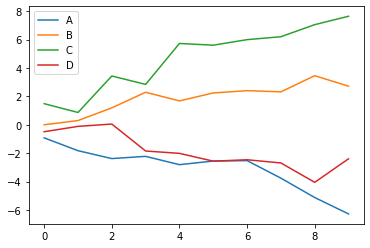

In [103]:
import matplotlib.pyplot as plt

for column in cs.columns:
    plt.plot(np.arange(0, 10), cs[column], label=column);

plt.legend()

In [78]:
df.head(2)

,A,B,C,D
0,-1.193392,-0.998210,-0.910331,-0.646515
1,2.616247,0.054321,-1.268539,-1.427663


In [79]:
df.tail(3)

,A,B,C,D
7,0.087931,-0.496821,-0.055641,-0.544830
8,-0.321149,0.724244,-0.113266,-0.874996
9,0.589142,0.794439,-0.989838,2.584363


In [97]:
df[['C', 'B']]

,C,B
0,1.490595,0.005108
1,-0.619255,0.296216
2,2.569850,0.894228
3,-0.593524,1.098891
4,2.883446,-0.608233
5,-0.120747,0.560166
6,0.389620,0.160292
7,0.205753,-0.081763
8,0.850141,1.136222
9,0.592615,-0.738397


In [ ]:
df['DD'] = df['D'].apply(f(x))
df.apply(lambda x: sum(x['one'], x['two']), axis=1)